<a href="https://colab.research.google.com/github/kebabee/ML-assiociative-memory/blob/main/classic_hopfield_network_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import matplotlib.pyplot as plt
import numpy as np
import requests
import zipfile
from io import BytesIO
from PIL import Image

# Define the URL of the raw hopfield_header.py file
hopfield_url = "https://raw.githubusercontent.com/kebabee/ML-assiociative-memory/bfa215afd00124cf2c32b26aea42381588e75982/hopfield_header.py"

# Download the hopfield_header.py file
response = requests.get(hopfield_url)

# Check if the request was successful
if response.status_code == 200:
    # Save the content to hopfield_header.py
    with open('hopfield_header.py', 'wb') as f:
        f.write(response.content)
    print("hopfield_header.py downloaded successfully.")
else:
    print("Failed to download hopfield_header.py.")

# Send a GET request to download the zip file
response = requests.get("https://github.com/kebabee/ML-assiociative-memory/raw/08eb242de52b29dd9ae769b8bb4af3714a884bab/letters/letters.zip")

# Check if the request was successful
if response.status_code == 200:
    # Read the content of the zip file
    zip_content = BytesIO(response.content)

    # Extract the zip file contents
    with zipfile.ZipFile(zip_content, 'r') as zip_ref:
        # Extract all contents to the 'letters' folder
        zip_ref.extractall('letters')
    print("Letters extraction successful.")
else:
    print("Failed to download the zip file.")


import hopfield_header as hopf

hopfield_header.py downloaded successfully.
Letters extraction successful.


In [60]:
A = np.where(np.array(Image.open('letters/A.png'))[:,:,0]<128,1,-1).reshape(-1)
N = np.where(np.array(Image.open('letters/N.png'))[:,:,0]<128,1,-1).reshape(-1)
O = np.where(np.array(Image.open('letters/O.png'))[:,:,0]<128,1,-1).reshape(-1)
Z = np.where(np.array(Image.open('letters/Z.png'))[:,:,0]<128,1,-1).reshape(-1)

letters_patterns = [A,N,O,Z]

network = hopf.hopfield_net(256)
network.learn([A,N,O,Z])
network.set_patterns([A,N,O,Z,-A,-N,-O,-Z])

noised_data = [
  hopf.noise(A, 20),
  hopf.noise(N, 20),
  hopf.noise(O, 20),
  hopf.noise(Z, 20),
  hopf.noise(A, 40),
  hopf.noise(N, 40),
  hopf.noise(O, 40),
  hopf.noise(Z, 40),
  hopf.noise(A, 100),
  hopf.noise(N, 100),
  hopf.noise(O, 100),
  hopf.noise(Z, 100),
  hopf.noise(-A, 20),
  hopf.noise(-N, 20),
  hopf.noise(-O, 20),
  hopf.noise(-Z, 20)
]

## Patterns learned by the network:

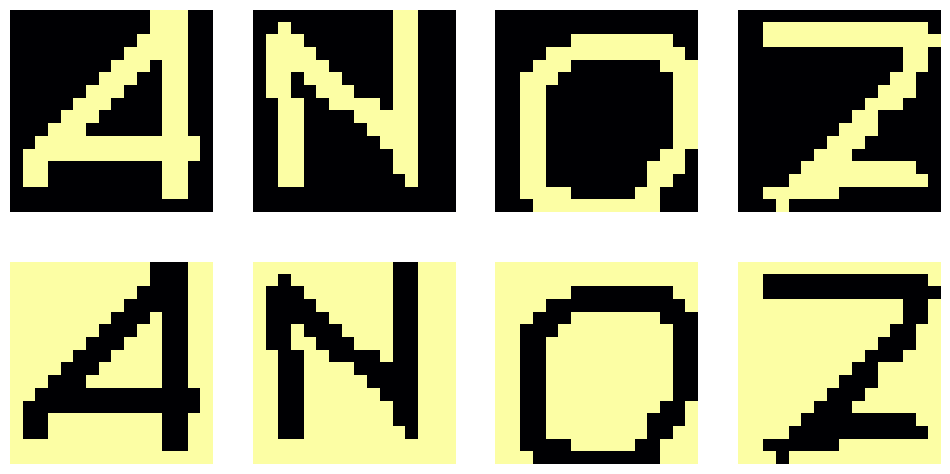

In [61]:
fig, axes = plt.subplots(2, 4, figsize=(12, 6))

for i in range(len(network.patterns)):
    row, col = i // 4, i % 4  # Oblicz indeksy rzędu i kolumny
    axes[row, col].imshow(network.patterns[i].reshape(16, 16), cmap='inferno')
    axes[row, col].axis('off')  # Wyłącz podpisy osi
plt.show()

## Noised dataset for testing

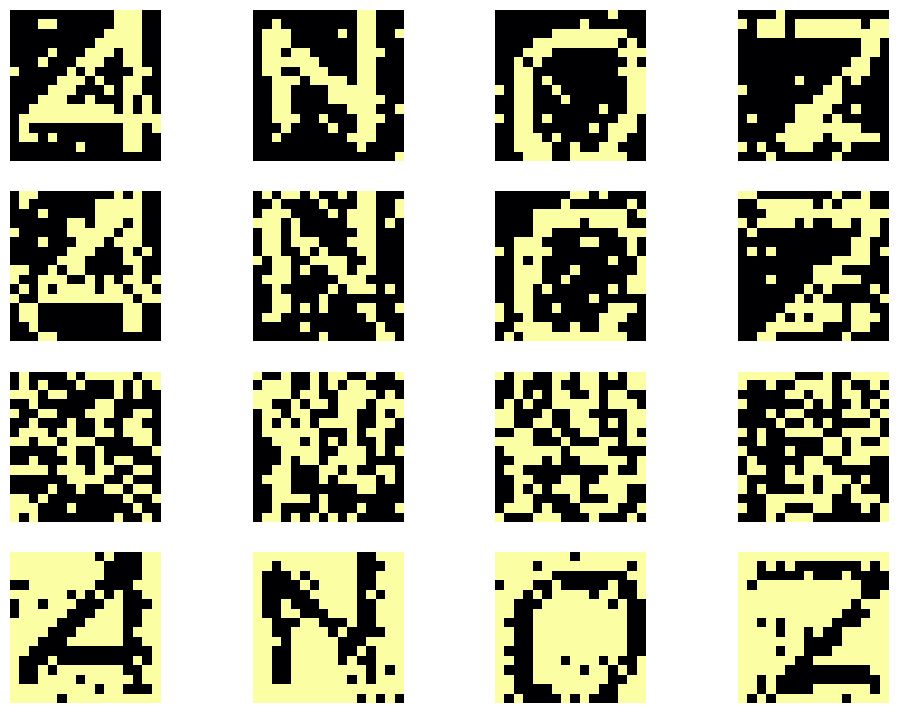

In [62]:
fig, axes = plt.subplots(4, 4, figsize=(12, 9))

for i in range(len(noised_data)):
    row, col = i // 4, i % 4  # Oblicz indeksy rzędu i kolumny
    axes[row, col].imshow(noised_data[i].reshape(16, 16), cmap='inferno')
    axes[row, col].axis('off')  # Wyłącz podpisy osi
plt.show()

## Results:

Iteration 0, energy: -35.02693926098634
Iteration 1, energy: -35.02693926098634
Completed in 1 iterations (network stable), error: 0
Iteration 0, energy: -36.003961664452994
Iteration 1, energy: -36.003961664452994
Completed in 1 iterations (network stable), error: 0
Iteration 0, energy: -34.0937313132204
Iteration 1, energy: -34.0937313132204
Completed in 1 iterations (network stable), error: 0
Iteration 0, energy: -32.91437492032409
Iteration 1, energy: -32.91437492032409
Completed in 1 iterations (network stable), error: 0
Iteration 0, energy: -35.02693926098634
Iteration 1, energy: -35.02693926098634
Completed in 1 iterations (network stable), error: 0
Iteration 0, energy: -36.003961664452994
Iteration 1, energy: -36.003961664452994
Completed in 1 iterations (network stable), error: 0
Iteration 0, energy: -34.0937313132204
Iteration 1, energy: -34.0937313132204
Completed in 1 iterations (network stable), error: 0
Iteration 0, energy: -32.91437492032409
Iteration 1, energy: -32.9143

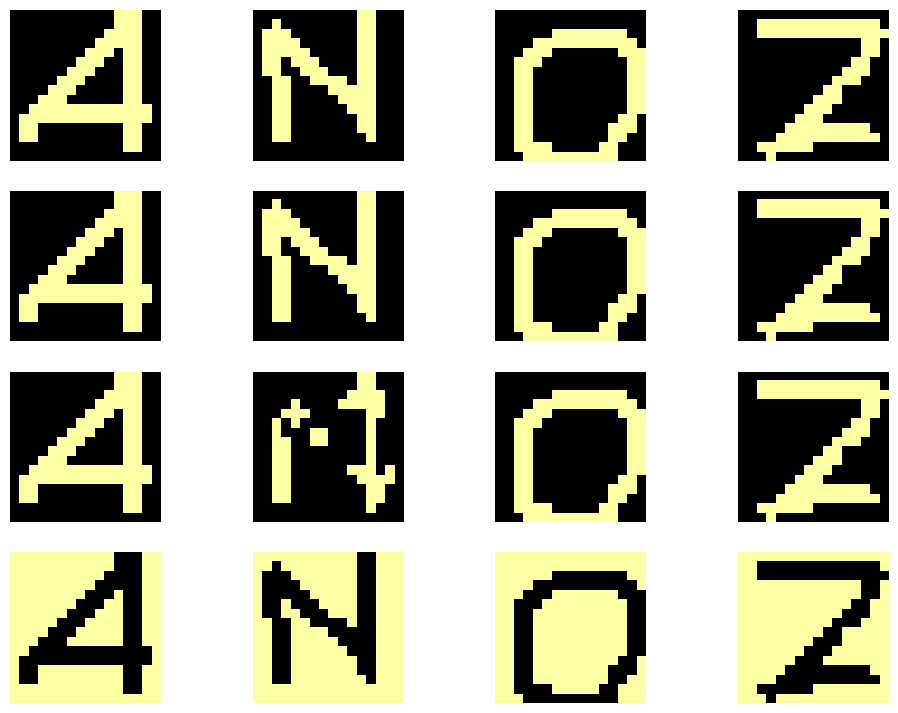

In [63]:
fig, axes = plt.subplots(4, 4, figsize=(12, 9))

for i in range(len(noised_data)):
  result = network.test(noised_data[i])
  row, col = i // 4, i % 4
  axes[row, col].imshow(result.reshape(16, 16), cmap='inferno')
  axes[row, col].axis('off')  # Wyłącz podpisy osi
plt.show()

Third row usually gives example of mixed state - network developed local energy minima that do not correspond to any of images in training set.